<a href="https://colab.research.google.com/github/EdsonOliveira18/Escritorio-de-Projeto-Logica-de-Programacao---Fase-2/blob/main/Escritorio_de_Projeto_Logica_de_Programacao_Fase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data: 01/01/1961
  Precip: 0.0
  Maxima: 33.8
  Minima: 22.2
  Horas_insol: 11.7
  Temp_media: 27.08
  Um_relativa: 67.0
  Vel_vento: 2.333333

Data: 02/01/1961
  Precip: 0.0
  Maxima: 34.7
  Minima: 22.5
  Horas_insol: 9.5
  Temp_media: 28.06
  Um_relativa: 62.5
  Vel_vento: 1.333333

Data: 03/01/1961
  Precip: 0.2
  Maxima: 27.7
  Minima: 23.1
  Horas_insol: 2.3
  Temp_media: 24.32
  Um_relativa: 74.25
  Vel_vento: 2.0

Data: 04/01/1961
  Precip: 2.4
  Maxima: 29.4
  Minima: 20.6
  Horas_insol: 8.7
  Temp_media: 23.56
  Um_relativa: 57.5
  Vel_vento: 2.333333

Data: 05/01/1961
  Precip: 0.0
  Maxima: 32.5
  Minima: 18.8
  Horas_insol: 10.1
  Temp_media: 25.22
  Um_relativa: 63.5
  Vel_vento: 3.666667

Data: 06/01/1961
  Precip: 3.8
  Maxima: 26.2
  Minima: 21.9
  Horas_insol: 0.4
  Temp_media: 23.06
  Um_relativa: 80.75
  Vel_vento: 2.666667

Data: 07/01/1961
  Precip: 1.6
  Maxima: 27.8
  Minima: 15.2
  Horas_insol: 11.7
  Temp_media: 21.34
  Um_relativa: 57.25
  Vel_vento: 1.666667

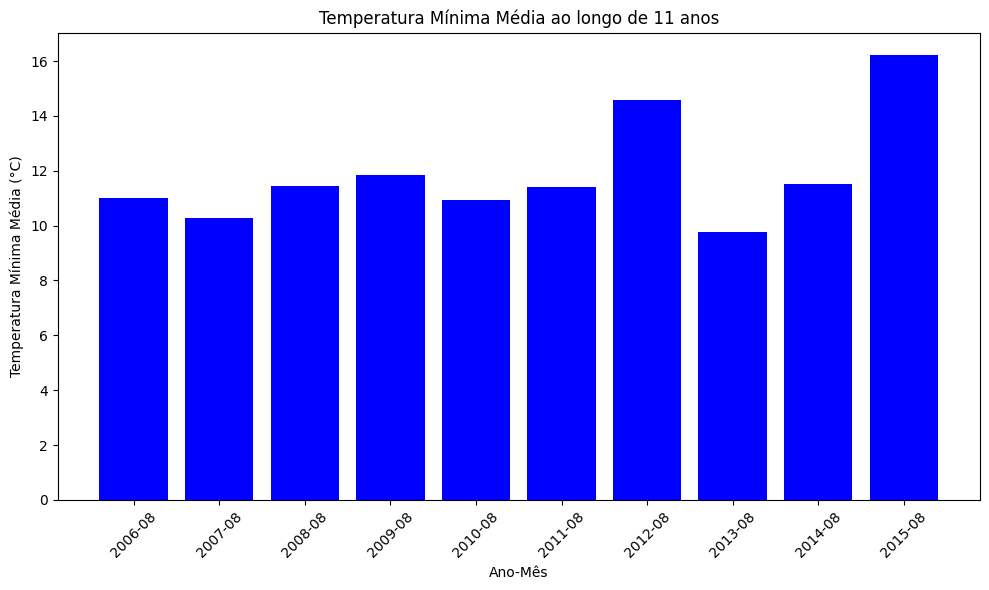


Temperatura mínima média geral para Agosto de 2006 a 2016: 11.90 °C



In [27]:
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt

# Função para carregar os dados do arquivo CSV
def carregar_dados_climaticos(caminho_arquivo: str) -> dict:
    dados = {}
    with open(caminho_arquivo, "r", encoding="utf-8") as file:
        leitor = csv.DictReader(file)
        for linha in leitor:
            data = linha['data']
            dados[data] = {
                "precip": float(linha["precip"]) if linha['precip'] else None,
                "maxima": float(linha["maxima"]) if linha["maxima"] else None,
                "minima": float(linha["minima"]) if linha["minima"] else None,
                "horas_insol": float(linha["horas_insol"]) if linha["horas_insol"] else None,
                "temp_media": float(linha["temp_media"]) if linha["temp_media"] else None,
                "um_relativa": float(linha["um_relativa"]) if linha["um_relativa"] else None,
                "vel_vento": float(linha["vel_vento"]) if linha["vel_vento"] else None
            }
    return dados

# Função para analisar a data
def analisar_data(data_linha):
    return datetime.strptime(data_linha, "%d/%m/%Y")

# Função para filtrar os dados por período
def filtrar_dados_periodo(dados_climaticos, data_inicio, data_final, tipo_de_dados = "tudo"):
    data_inicio = analisar_data(data_inicio)
    data_final = analisar_data(data_final)

    dados_filtrados = {}
    for data, valores in dados_climaticos.items():
        data_atual = analisar_data(data)
        if data_inicio <= data_atual <= data_final:
            if tipo_de_dados == "tudo":
                dados_filtrados[data] = valores
            elif tipo_de_dados == "precipitation":
                dados_filtrados[data] = {"precip": valores["precip"]}
            elif tipo_de_dados == "temperature":
                dados_filtrados[data] = {"maxima": valores["maxima"], "minima": valores["minima"]}
            elif tipo_de_dados == "humidity_wind":
                dados_filtrados[data] = {"um_relativa": valores["um_relativa"], "vel_vento": valores["vel_vento"]}

    return dados_filtrados

# Função para exibir os dados
def mostrar_dados(dados):
    if not dados:
        print("Sem dados disponível para o período selecionado.")
        return

    for data, valores in dados.items():
        print(f"Data: {data}")
        for chave, valor in valores.items():
            print(f"  {chave.capitalize()}: {valor}")
        print()

# Função para encontrar o mês mais chuvoso
def encontrar_mes_mais_chuvoso(dados_climaticos):
    precipitacao_mensal = {}
    for data, valor in dados_climaticos.items():
        ano, mes, _ = analisar_data(data).timetuple()[:3]
        chave = (ano, mes)
        if valor["precip"] is not None:
            precipitacao_mensal[chave] = precipitacao_mensal.get(chave, 0) + valor["precip"]

    mes_mais_chuvoso = max(precipitacao_mensal, key=precipitacao_mensal.get)
    return mes_mais_chuvoso, precipitacao_mensal[mes_mais_chuvoso]

# Função para calcular a média da temperatura mínima
def calcular_temp_minima(dados_climaticos, mes, ano_inicio=2006, ano_final=2016):
    temp_minima_media = {}
    for ano in range(ano_inicio, ano_final + 1):
        temperatura_mensal = [valor['minima'] for data, valor in dados_climaticos.items() if analisar_data(data).month == mes and analisar_data(data).year == ano and valor['minima'] is not None]
        if temperatura_mensal:
            temp_minima_media[f"{ano}-{mes:02}"] = sum(temperatura_mensal) / len(temperatura_mensal)
    return temp_minima_media

# Função para gerar gráfico de barras
def plot_temp_minima(temp_minima_media):
    anos_meses = list(temp_minima_media.keys())
    temp_media = list(temp_minima_media.values())

    plt.figure(figsize=(10, 6))
    plt.bar(anos_meses, temp_media, color='blue')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Temperatura Mínima Média (°C)')
    plt.title('Temperatura Mínima Média ao longo de 11 anos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Função para calcular a média geral da temperatura mínima
def calcular_temp_min_geral(temp_minima_media):
    return sum(temp_minima_media.values()) / len(temp_minima_media) if temp_minima_media else None

# Caminho relativo do arquivo CSV
arquivo_csv = "Anexo_Arquivo_Dados_Projeto_Logica_e_programacao_de_computadores.csv"

# Verificar se o arquivo CSV existe
if not os.path.exists(arquivo_csv):
    print(f"Arquivo não encontrado: {arquivo_csv}")
else:
    # Carregar os dados climáticos
    dados_climaticos = carregar_dados_climaticos(arquivo_csv)

    # Exemplo de uso: Visualização de intervalo de dados em modo texto
    data_inicio = "01/01/1961"
    data_final = "31/01/1961"
    tipo_de_dados = "tudo"
    dados_filtrados = filtrar_dados_periodo(dados_climaticos, data_inicio, data_final, tipo_de_dados = "tudo"
)
    mostrar_dados(dados_filtrados)

    # Exemplo de uso: Mês mais chuvoso
    mes_chuvoso, precipitacao_maxima = encontrar_mes_mais_chuvoso(dados_climaticos)
    print(f"O mês mais chuvoso é {mes_chuvoso[1]}/{mes_chuvoso[0]} com {precipitacao_maxima:.2f} mm de precipitação.")

    # Exemplo de uso: Média da temperatura mínima para um mês específico nos últimos 11 anos
    mes = 8  # Por exemplo, mês de agosto
    temp_minima_media = calcular_temp_minima(dados_climaticos, mes)
    print(f"Temperaturas mínimas médias para agosto de 2006 a 2016:\n{temp_minima_media}\n")

    # Exemplo de uso: Gráfico de barras
    plot_temp_minima(temp_minima_media)

    # Exemplo de uso: Média geral da temperatura mínima para o mês específico
    media_temp_geral = calcular_temp_min_geral(temp_minima_media)
    print(f"\nTemperatura mínima média geral para Agosto de 2006 a 2016: {media_temp_geral:.2f} °C\n")
